## Spiro-Spiro Blastn Output

Threshold= 95% pi   &   >1000

count= 3773

In [1]:
blastn_file =("/opt/zeynep/spironucleus/spiro_spiro.blastn")
import pandas as pd

df=pd.read_csv(blastn_file, sep="\t", header=None)
df=df.drop(columns=[10,11,12,13,14])
df=df[(df[2]>95 )& (df[3]>1000)]
print(len(df))
df.head(10)

3773


,0,1,2,3,4,5,6,7,8,9
0,chr1,chr1,100.000,1924143,0,0,1,1924143,1,1924143
1,chr1,chr1,97.042,11631,317,22,19902,31520,8996,20611
2,chr1,chr1,97.042,11631,317,22,8996,20611,19902,31520
3,chr1,chr1,99.685,10796,34,0,1081551,1092346,1079671,1068876
4,chr1,chr1,99.685,10796,34,0,1068876,1079671,1092346,1081551
5,chr1,chr1,97.647,10923,231,19,34932,45838,20253,31165
6,chr1,chr1,97.647,10923,231,19,20253,31165,34932,45838
7,chr1,chr1,96.934,10925,306,25,34932,45838,9343,20256
8,chr1,chr1,96.934,10925,306,25,9343,20256,34932,45838
9,chr1,chr1,99.784,9259,19,1,1236980,1246238,1229538,1220281


## Self Match

### Self-match & same direction
count= 44

In [11]:
df1=df[df[6] == df[8]]
#df1=df[(df[4] == 0) & (df[5] == 0)]

print(len(df1))
df1.sample(20)

44


,0,1,2,3,4,5,6,7,8,9
79581,tig00000034,tig00000034,100.0,17924,0,0,1,17924,1,17924
77065,tig00000032,tig00000032,100.0,19931,0,0,1,19931,1,19931
83382,tig00000108,tig00000108,100.0,14210,0,0,1,14210,1,14210
81843,tig00000052,tig00000052,100.0,18104,0,0,1,18104,1,18104
0,chr1,chr1,100.0,1924143,0,0,1,1924143,1,1924143
76824,tig00000030,tig00000030,100.0,9849,0,0,1,9849,1,9849
45948,chr6,chr6,100.0,1673122,0,0,1,1673122,1,1673122
76212,tig00000015,tig00000015,100.0,19102,0,0,1,19102,1,19102
80169,tig00000041,tig00000041,100.0,17330,0,0,1,17330,1,17330
82269,tig00000057,tig00000057,100.0,17628,0,0,1,17628,1,17628


### Self-match & opposite direction¶ 
-Not true becasue the gaps and mismatches are not 0

count= 11

In [272]:
df2=df[df[6] == df[9]]
print(len(df2))
df2

11


,0,1,2,3,4,5,6,7,8,9
87,chr1,chr1,97.434,2962,56,12,1037148,1040099,1040099,1037148
14058,chr3,chr3,99.937,3171,2,0,1525384,1528554,1522214,1525384
14260,chr3,chr3,99.811,1586,3,0,1533775,1535360,1532190,1533775
26920,chr4,chr4,97.976,8103,25,26,871089,879092,863027,871089
45974,chr6,chr6,99.330,7017,39,6,868964,875976,875976,868964
46029,chr6,chr6,98.726,5494,62,4,1005292,1010781,1010781,1005292
46081,chr6,chr6,98.246,4163,51,6,1155022,1159173,1159173,1155022
55590,chr7,chr7,98.852,8190,52,14,544020,552188,552188,544020
55607,chr7,chr7,98.829,4612,38,8,685542,690145,690145,685542
61705,chr9,chr9,96.288,1697,57,5,67789,69481,66095,67789


In [273]:
df12=pd.concat([df1,df2], axis=0)
print(len(df12))


55


## All matches - Self match
count= 3718

1) Charachterizing the matches; are they pair or more? 

In [274]:
#All matches - Self match
def anti_join(x, y):
    """Return rows in x which are not present in y"""
    ans = pd.merge(left=x, right=y, how='left', indicator=True)
    ans = ans.loc[ans._merge == 'left_only', :].drop(columns='_merge')
    ans= ans.reset_index()
    return ans
print(len(anti_join(df, df12)))
df=anti_join(df, df12).drop(columns="index")
df.head(10)

3718


,0,1,2,3,4,5,6,7,8,9
0,chr1,chr1,97.042,11631,317,22,19902,31520,8996,20611
1,chr1,chr1,97.042,11631,317,22,8996,20611,19902,31520
2,chr1,chr1,99.685,10796,34,0,1081551,1092346,1079671,1068876
3,chr1,chr1,99.685,10796,34,0,1068876,1079671,1092346,1081551
4,chr1,chr1,97.647,10923,231,19,34932,45838,20253,31165
5,chr1,chr1,97.647,10923,231,19,20253,31165,34932,45838
6,chr1,chr1,96.934,10925,306,25,34932,45838,9343,20256
7,chr1,chr1,96.934,10925,306,25,9343,20256,34932,45838
8,chr1,chr1,99.784,9259,19,1,1236980,1246238,1229538,1220281
9,chr1,chr1,99.784,9259,19,1,1220281,1229538,1246238,1236980


## Group Matches by the number of occurences
considering the first 5 columns (excluding locations)

In [119]:
#count number of duplication occurences
cols=list(range(6))
df1 = df[df.duplicated(subset=cols,keep=False)].copy()
df1 = df1.sort_values(cols)
df1['group'] = 'g' + (df1.groupby(cols).ngroup() + 1).astype(str)
df1['duplicate_count'] = df1.groupby(cols)[2].transform('size')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,group,duplicate_count
122,chr1,chr1,95.017,1746,74,11,44109,45847,30125,31864,g1,2
123,chr1,chr1,95.017,1746,74,11,30125,31864,44109,45847,g1,2
136,chr1,chr1,95.182,1515,66,6,46034,47544,18400,19911,g2,2
137,chr1,chr1,95.182,1515,66,6,18400,19911,46034,47544,g2,2
50,chr1,chr1,95.450,2835,85,9,913169,915992,911242,908441,g3,2
51,chr1,chr1,95.450,2835,85,9,908441,911242,915992,913169,g3,2
118,chr1,chr1,95.539,1726,69,7,44117,45838,32197,33918,g4,2
119,chr1,chr1,95.539,1726,69,7,32197,33918,44117,45838,g4,2
182,chr1,chr1,95.594,1044,42,3,33564,34605,29435,30476,g5,2
183,chr1,chr1,95.594,1044,42,3,29435,30476,33564,34605,g5,2


In [145]:
dc=df1.groupby("duplicate_count")
dc.first()

,0,1,2,3,4,5,6,7,8,9,group
duplicate_count,,,,,,,,,,,
2,chr1,chr1,95.017,1746,74,11,44109,45847,30125,31864,g1
3,chr1,chr7,96.609,1386,40,1,184774,186152,243897,245282,g73
4,chr1,chr1,99.543,1312,6,0,1168414,1169725,1166704,1168015,g33
5,chr3,tig00000057,99.811,1586,3,0,1548972,1550557,8220,6635,g351
6,chr1,chr1,99.512,1435,7,0,1165318,1166752,1163116,1164550,g30
8,chr1,chr1,99.941,1705,1,0,1166881,1168585,1162153,1163857,g66
10,chr9,chr9,99.531,2131,10,0,248771,250901,214871,217001,g990
12,chr9,chr9,99.859,2131,3,0,223362,225492,216834,218964,g1063
13,chr3,chr3,99.811,1586,3,0,1538999,1540584,1523799,1525384,g305


### Examples:

### get the hits with 3 occurences
Compare the indexes 

    195, 196,197 = chr7 matches with chr1 in 3 diff locations (see 6,7)
    1443,1444,1445 = chr4 matches with tig..1 in 3 diff locations (see 8,9)

In [148]:
dc_3=dc.get_group(3)
dc_3

,0,1,2,3,4,5,6,7,8,9,group
195,chr1,chr7,96.609,1386,40,1,184774,186152,243897,245282,g73
196,chr1,chr7,96.609,1386,40,1,203957,205335,245282,243897,g73
197,chr1,chr7,96.609,1386,40,1,193371,194749,245282,243897,g73
1443,chr4,tig00000001,95.688,1600,51,8,968322,969914,10954,12542,g447
1444,chr4,tig00000001,95.688,1600,51,8,968322,969914,12458,14046,g447
1445,chr4,tig00000001,95.688,1600,51,8,968322,969914,18474,20062,g447
2566,chr7,chr1,96.609,1386,40,1,243897,245282,184774,186152,g805
2567,chr7,chr1,96.609,1386,40,1,243897,245282,194749,193371,g805
2568,chr7,chr1,96.609,1386,40,1,243897,245282,205335,203957,g805
3319,tig00000001,chr4,95.688,1600,51,8,10954,12542,968322,969914,g1075


In [154]:
dc_3.groupby([0,1,6,7,8,9]).count()

2  3  4  5  group
0           1           6      7      8      9                        
chr1        chr7        184774 186152 243897 245282  1  1  1  1      1
                        193371 194749 245282 243897  1  1  1  1      1
                        203957 205335 245282 243897  1  1  1  1      1
chr4        tig00000001 968322 969914 10954  12542   1  1  1  1      1
                                      12458  14046   1  1  1  1      1
                                      18474  20062   1  1  1  1      1
chr7        chr1        243897 245282 184774 186152  1  1  1  1      1
                                      194749 193371  1  1  1  1      1
                                      205335 203957  1  1  1  1      1
tig00000001 chr4        10954  12542  968322 969914  1  1  1  1      1
                        12458  14046  968322 969914  1  1  1  1      1
                        18474  20062  968322 969914  1  1  1  1      1

### get the hits with 10 occurences

In [131]:
dc_10=dc.get_group(10)
dc_10

,0,1,2,3,4,5,6,7,8,9,group
3114,chr9,chr9,99.531,2131,10,0,248771,250901,214871,217001,g990
3115,chr9,chr9,99.531,2131,10,0,254873,257003,214871,217001,g990
3116,chr9,chr9,99.531,2131,10,0,272965,275095,221186,223316,g990
3117,chr9,chr9,99.531,2131,10,0,278854,280984,221186,223316,g990
3118,chr9,chr9,99.531,2131,10,0,257049,259179,227288,229418,g990
3119,chr9,chr9,99.531,2131,10,0,214871,217001,248771,250901,g990
3120,chr9,chr9,99.531,2131,10,0,214871,217001,254873,257003,g990
3121,chr9,chr9,99.531,2131,10,0,227288,229418,257049,259179,g990
3122,chr9,chr9,99.531,2131,10,0,221186,223316,272965,275095,g990
3123,chr9,chr9,99.531,2131,10,0,221186,223316,278854,280984,g990


In [152]:
dc_10.groupby([0,1,6,7,8,9]).count()

2  3  4  5  group
0    1    6      7      8      9                        
chr9 chr9 214871 217001 248771 250901  1  1  1  1      1
                        254873 257003  1  1  1  1      1
          221186 223316 272965 275095  1  1  1  1      1
                        278854 280984  1  1  1  1      1
          227288 229418 257049 259179  1  1  1  1      1
          248771 250901 214871 217001  1  1  1  1      1
          254873 257003 214871 217001  1  1  1  1      1
          257049 259179 227288 229418  1  1  1  1      1
          272965 275095 221186 223316  1  1  1  1      1
          278854 280984 221186 223316  1  1  1  1      1

###  get the hits with 20 occurences¶

In [153]:
dc_20=dc.get_group(20)
dc_20.groupby([0,1,6,7,8,9]).count()

2  3  4  5  group
0    1    6      7      8      9                        
chr9 chr9 212482 214612 272965 275095  1  1  1  1      1
                        274928 277058  1  1  1  1      1
                        276891 279021  1  1  1  1      1
                        278854 280984  1  1  1  1      1
          214871 217001 216834 218964  1  1  1  1      1
          216834 218964 214871 217001  1  1  1  1      1
                        250947 253077  1  1  1  1      1
          219010 221140 263151 265281  1  1  1  1      1
                        267076 269206  1  1  1  1      1
                        269039 271169  1  1  1  1      1
                        271002 273132  1  1  1  1      1
          221186 223316 229251 231381  1  1  1  1      1
                        274928 277058  1  1  1  1      1
                        276891 279021  1  1  1  1      1
          229251 231381 221186 223316  1  1  1  1      1
          246808 248938 257049 259179  1  1  1  1      1
          248771 250901 250947 253077  1  1  1  1      1
          250947 253077 216834 218964  1  1  1  1      1
                        248771 250901  1  1  1  1      1
                        254873 257003  1  1  1  1      1
          254873 257003 250947 253077  1  1  1  1      1
          257049 259179 246808 248938  1  1  1  1      1
                        272965 275095  1  1  1  1      1
                        274928 277058  1  1  1  1      1
                        276891 279021  1  1  1  1      1
                        278854 280984  1  1  1  1      1
          263151 265281 219010 221140  1  1  1  1      1
          267076 269206 219010 221140  1  1  1  1      1
          269039 271169 219010 221140  1  1  1  1      1
          271002 273132 219010 221140  1  1  1  1      1
          272965 275095 212482 214612  1  1  1  1      1
                        257049 259179  1  1  1  1      1
          274928 277058 212482 214612  1  1  1  1      1
                        221186 223316  1  1  1  1      1
                        257049 259179  1  1  1  1      1
          276891 279021 212482 214612  1  1  1  1      1
                        221186 223316  1  1  1  1      1
                        257049 259179  1  1  1  1      1
          278854 280984 212482 214612  1  1  1  1      1
                        257049 259179  1  1  1  1      1

## Group Matches by the number of occurences 2
Columns 6-7 and 8-9 has the same information thus, creates duplication

Consider only 6-7 and repeat the grouping

In [275]:
#count number of duplication occurences
cols=list(range(6))
df1 = df[df.duplicated(subset=cols,keep=False)].copy()
df1 = df1.sort_values(cols)
df1['group'] = 'g' + (df1.groupby(cols).ngroup() + 1).astype(str)
df1['duplicate_count'] = df1.groupby(cols)[2].transform('size')
print(len(df1))
df1.head(10)

2595


,0,1,2,3,4,5,6,7,8,9,group,duplicate_count
122,chr1,chr1,95.017,1746,74,11,44109,45847,30125,31864,g1,2
123,chr1,chr1,95.017,1746,74,11,30125,31864,44109,45847,g1,2
136,chr1,chr1,95.182,1515,66,6,46034,47544,18400,19911,g2,2
137,chr1,chr1,95.182,1515,66,6,18400,19911,46034,47544,g2,2
50,chr1,chr1,95.450,2835,85,9,913169,915992,911242,908441,g3,2
51,chr1,chr1,95.450,2835,85,9,908441,911242,915992,913169,g3,2
118,chr1,chr1,95.539,1726,69,7,44117,45838,32197,33918,g4,2
119,chr1,chr1,95.539,1726,69,7,32197,33918,44117,45838,g4,2
182,chr1,chr1,95.594,1044,42,3,33564,34605,29435,30476,g5,2
183,chr1,chr1,95.594,1044,42,3,29435,30476,33564,34605,g5,2


In [276]:
dc=df1.groupby("duplicate_count")
dc.first()

,0,1,2,3,4,5,6,7,8,9,group
duplicate_count,,,,,,,,,,,
2,chr1,chr1,95.017,1746,74,11,44109,45847,30125,31864,g1
3,chr1,chr7,96.609,1386,40,1,184774,186152,243897,245282,g73
4,chr1,chr1,99.543,1312,6,0,1168414,1169725,1166704,1168015,g33
5,chr3,tig00000057,99.811,1586,3,0,1548972,1550557,8220,6635,g351
6,chr1,chr1,99.512,1435,7,0,1165318,1166752,1163116,1164550,g30
8,chr1,chr1,99.941,1705,1,0,1166881,1168585,1162153,1163857,g66
10,chr9,chr9,99.531,2131,10,0,248771,250901,214871,217001,g990
12,chr9,chr9,99.859,2131,3,0,223362,225492,216834,218964,g1063
13,chr3,chr3,99.811,1586,3,0,1538999,1540584,1523799,1525384,g305


## PLOT: Number of Repeats in all matches of Blastn

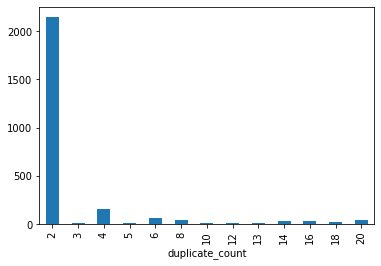

In [277]:
dc.size().plot(kind = 'bar')

## Example of a repeat

### get the hits with 2 occurences¶


In [278]:
dc_2=dc.get_group(2)
dc_2=dc_2.groupby([0,1,6,7])
dc_2.count()

2  3  4  5  8  9  group
0           1           6     7                             
chr1        chr1        8996  20611  1  1  1  1  1  1      1
                        9343  20256  1  1  1  1  1  1      1
                        18400 19911  1  1  1  1  1  1      1
                        19902 31520  1  1  1  1  1  1      1
                        20253 31165  1  1  1  1  1  1      1
...                                 .. .. .. .. .. ..    ...
tig00000062 tig00000062 8790  12616  1  1  1  1  1  1      1
                        9006  12616  1  1  1  1  1  1      1
                        9222  12616  1  1  1  1  1  1      1
                        9330  12616  1  1  1  1  1  1      1
                        10086 12616  1  1  1  1  1  1      1

[1826 rows x 7 columns]

limit_output extension: Maximum message size of 10000 exceeded with 12015 characters

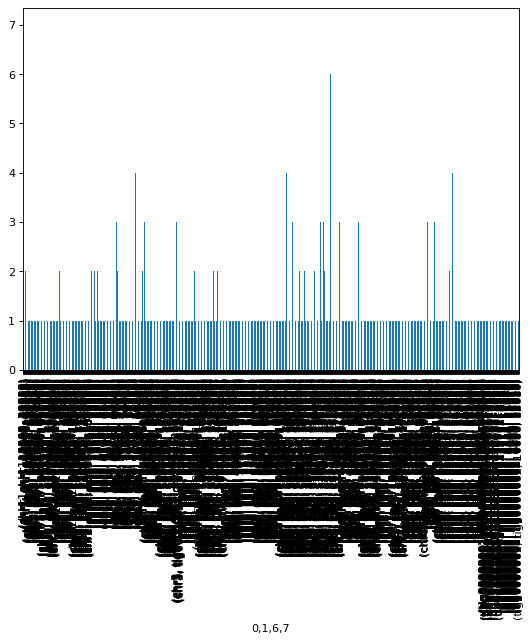

In [203]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

dc_2.size().plot(kind = 'bar')

In [204]:
dc_2.get_group(("chr1","chr1",34932,45838))

,0,1,2,3,4,5,6,7,8,9,group
6,chr1,chr1,96.934,10925,306,25,34932,45838,9343,20256,g9
4,chr1,chr1,97.647,10923,231,19,34932,45838,20253,31165,g12


### get the hits with 20 occurences¶

consider the first raw that has 4 repeats

compare indexes:

    3088,3089,3093,3043 location 6-7 matches with 8-9 in 4 different places
    

In [279]:
dc_20=dc.get_group(20)
dc_20=dc_20.groupby([0,1,6,7])
dc_20.count()

2  3  4  5  8  9  group
0    1    6      7                              
chr9 chr9 212482 214612  4  4  4  4  4  4      4
          214871 217001  1  1  1  1  1  1      1
          216834 218964  2  2  2  2  2  2      2
          219010 221140  4  4  4  4  4  4      4
          221186 223316  3  3  3  3  3  3      3
          229251 231381  1  1  1  1  1  1      1
          246808 248938  1  1  1  1  1  1      1
          248771 250901  1  1  1  1  1  1      1
          250947 253077  3  3  3  3  3  3      3
          254873 257003  1  1  1  1  1  1      1
          257049 259179  5  5  5  5  5  5      5
          263151 265281  1  1  1  1  1  1      1
          267076 269206  1  1  1  1  1  1      1
          269039 271169  1  1  1  1  1  1      1
          271002 273132  1  1  1  1  1  1      1
          272965 275095  2  2  2  2  2  2      2
          274928 277058  3  3  3  3  3  3      3
          276891 279021  3  3  3  3  3  3      3
          278854 280984  2  2  2  2  2  2      2

In [280]:
#pick the first 
dc_20.get_group(("chr9","chr9",212482,214612))

,0,1,2,3,4,5,6,7,8,9,group
3088,chr9,chr9,99.625,2131,8,0,212482,214612,272965,275095,g1009
3089,chr9,chr9,99.625,2131,8,0,212482,214612,274928,277058,g1009
3093,chr9,chr9,99.625,2131,8,0,212482,214612,278854,280984,g1009
3043,chr9,chr9,99.718,2131,6,0,212482,214612,276891,279021,g1036


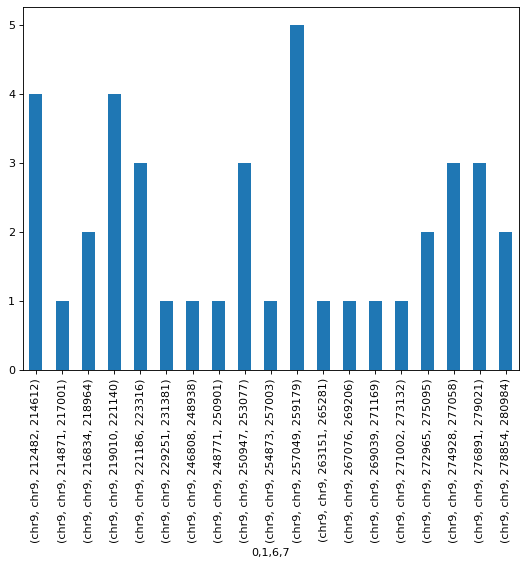

In [201]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

dc_20.size().plot(kind = 'bar')


## Plots for Repeats Overlook

### Within chromosome Matches

In [262]:
#count number of duplication occurences
cols=list(range(6))
dfw=df[df[0] == df[1]]
dfw = dfw[dfw.duplicated(subset=cols,keep=False)].copy()
dfw = dfw.sort_values(cols)
dfw['group'] = 'g' + (dfw.groupby(cols).ngroup() + 1).astype(str)
dfw['duplicate_count'] = dfw.groupby(cols)[2].transform('size')
print(len(dfw))
dfw.head(10)

2497


,0,1,2,3,4,5,6,7,8,9,group,duplicate_count
122,chr1,chr1,95.017,1746,74,11,44109,45847,30125,31864,g1,2
123,chr1,chr1,95.017,1746,74,11,30125,31864,44109,45847,g1,2
136,chr1,chr1,95.182,1515,66,6,46034,47544,18400,19911,g2,2
137,chr1,chr1,95.182,1515,66,6,18400,19911,46034,47544,g2,2
50,chr1,chr1,95.450,2835,85,9,913169,915992,911242,908441,g3,2
51,chr1,chr1,95.450,2835,85,9,908441,911242,915992,913169,g3,2
118,chr1,chr1,95.539,1726,69,7,44117,45838,32197,33918,g4,2
119,chr1,chr1,95.539,1726,69,7,32197,33918,44117,45838,g4,2
182,chr1,chr1,95.594,1044,42,3,33564,34605,29435,30476,g5,2
183,chr1,chr1,95.594,1044,42,3,29435,30476,33564,34605,g5,2


In [265]:
dcw=dfw.groupby("duplicate_count")
dcw.first()


,0,1,2,3,4,5,6,7,8,9,group
duplicate_count,,,,,,,,,,,
2,chr1,chr1,95.017,1746,74,11,44109,45847,30125,31864,g1
4,chr1,chr1,99.543,1312,6,0,1168414,1169725,1166704,1168015,g33
6,chr1,chr1,99.512,1435,7,0,1165318,1166752,1163116,1164550,g30
8,chr1,chr1,99.941,1705,1,0,1166881,1168585,1162153,1163857,g66
10,chr9,chr9,99.531,2131,10,0,248771,250901,214871,217001,g965
12,chr9,chr9,99.859,2131,3,0,223362,225492,216834,218964,g1038
13,chr3,chr3,99.811,1586,3,0,1538999,1540584,1523799,1525384,g304
14,chr3,chr3,99.857,1400,2,0,1522400,1523799,1517179,1518578,g317
16,chr1,chr1,99.466,1312,7,0,1166704,1168015,1162546,1163857,g28


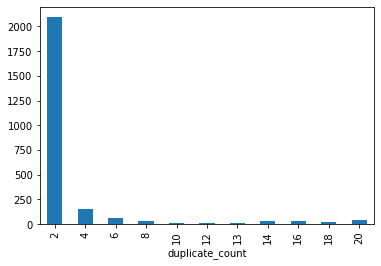

In [266]:
dcw.size().plot(kind = 'bar')

### Across chromosome Matches

In [264]:
#count number of duplication occurences
cols=list(range(6))
dfa=df[df[0] != df[1]]
dfa = dfa[dfa.duplicated(subset=cols,keep=False)].copy()
dfa = dfa.sort_values(cols)
dfa['group'] = 'g' + (dfa.groupby(cols).ngroup() + 1).astype(str)
dfa['duplicate_count'] = dfa.groupby(cols)[2].transform('size')
print(len(dfa))
dfa.head(10)

98


,0,1,2,3,4,5,6,7,8,9,group,duplicate_count
195,chr1,chr7,96.609,1386,40,1,184774,186152,243897,245282,g1,3
196,chr1,chr7,96.609,1386,40,1,203957,205335,245282,243897,g1,3
197,chr1,chr7,96.609,1386,40,1,193371,194749,245282,243897,g1,3
1162,chr3,chr5,95.490,1020,41,4,62394,63409,1692887,1691869,g2,2
1163,chr3,chr5,95.490,1020,41,4,62394,63409,1704098,1703080,g2,2
1059,chr3,chr5,95.538,1367,52,7,66120,67482,1692887,1691526,g3,2
1061,chr3,chr5,95.538,1367,52,7,54586,55947,1721011,1719649,g3,2
1122,chr3,chr5,96.267,1018,36,2,62394,63409,1706465,1705448,g4,2
1123,chr3,chr5,96.267,1018,36,2,78048,79065,1709508,1708493,g4,2
927,chr3,tig00000057,99.560,1136,5,0,1552142,1553277,2997,1862,g5,2


In [267]:
dca=dfa.groupby("duplicate_count")
dca.first()


,0,1,2,3,4,5,6,7,8,9,group
duplicate_count,,,,,,,,,,,
2,chr3,chr5,95.490,1020,41,4,62394,63409,1692887,1691869,g2
3,chr1,chr7,96.609,1386,40,1,184774,186152,243897,245282,g1
4,chr4,tig00000001,95.625,1600,52,8,968322,969914,13962,15550,g14
5,chr3,tig00000057,99.811,1586,3,0,1548972,1550557,8220,6635,g8
8,chr3,tig00000057,99.857,1400,2,0,1517179,1518578,2811,1412,g10


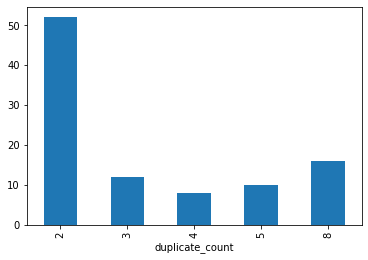

In [268]:
dca.size().plot(kind = 'bar')